In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from env import host, user, password
from sklearn.model_selection import train_test_split

In [6]:
def get_zillow_data(host = host, user = user, password = password):
    db = 'zillow'
    return pd.read_sql('SELECT * FROM properties_2017 ORDER BY RAND() LIMIT 10000', f'mysql+pymysql://{user}:{password}@{host}/{db}')

In [7]:
zillow = get_zillow_data()

In [32]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10000 non-null  int64  
 1   parcelid                      10000 non-null  int64  
 2   bathroomcnt                   9981 non-null   float64
 3   bedroomcnt                    9981 non-null   float64
 4   calculatedbathnbr             9597 non-null   float64
 5   calculatedfinishedsquarefeet  9849 non-null   float64
 6   fips                          9981 non-null   float64
 7   fullbathcnt                   9597 non-null   float64
 8   lotsizesquarefeet             9070 non-null   float64
 9   propertycountylandusecode     9981 non-null   object 
 10  regionidzip                   9959 non-null   float64
 11  regionidcity                  9793 non-null   float64
 12  yearbuilt                     9837 non-null   float64
 13  st

In [21]:
zillow_plot = zillow[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
                      'lotsizesquarefeet',  'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt', 
                      'taxvaluedollarcnt', 'taxamount']]

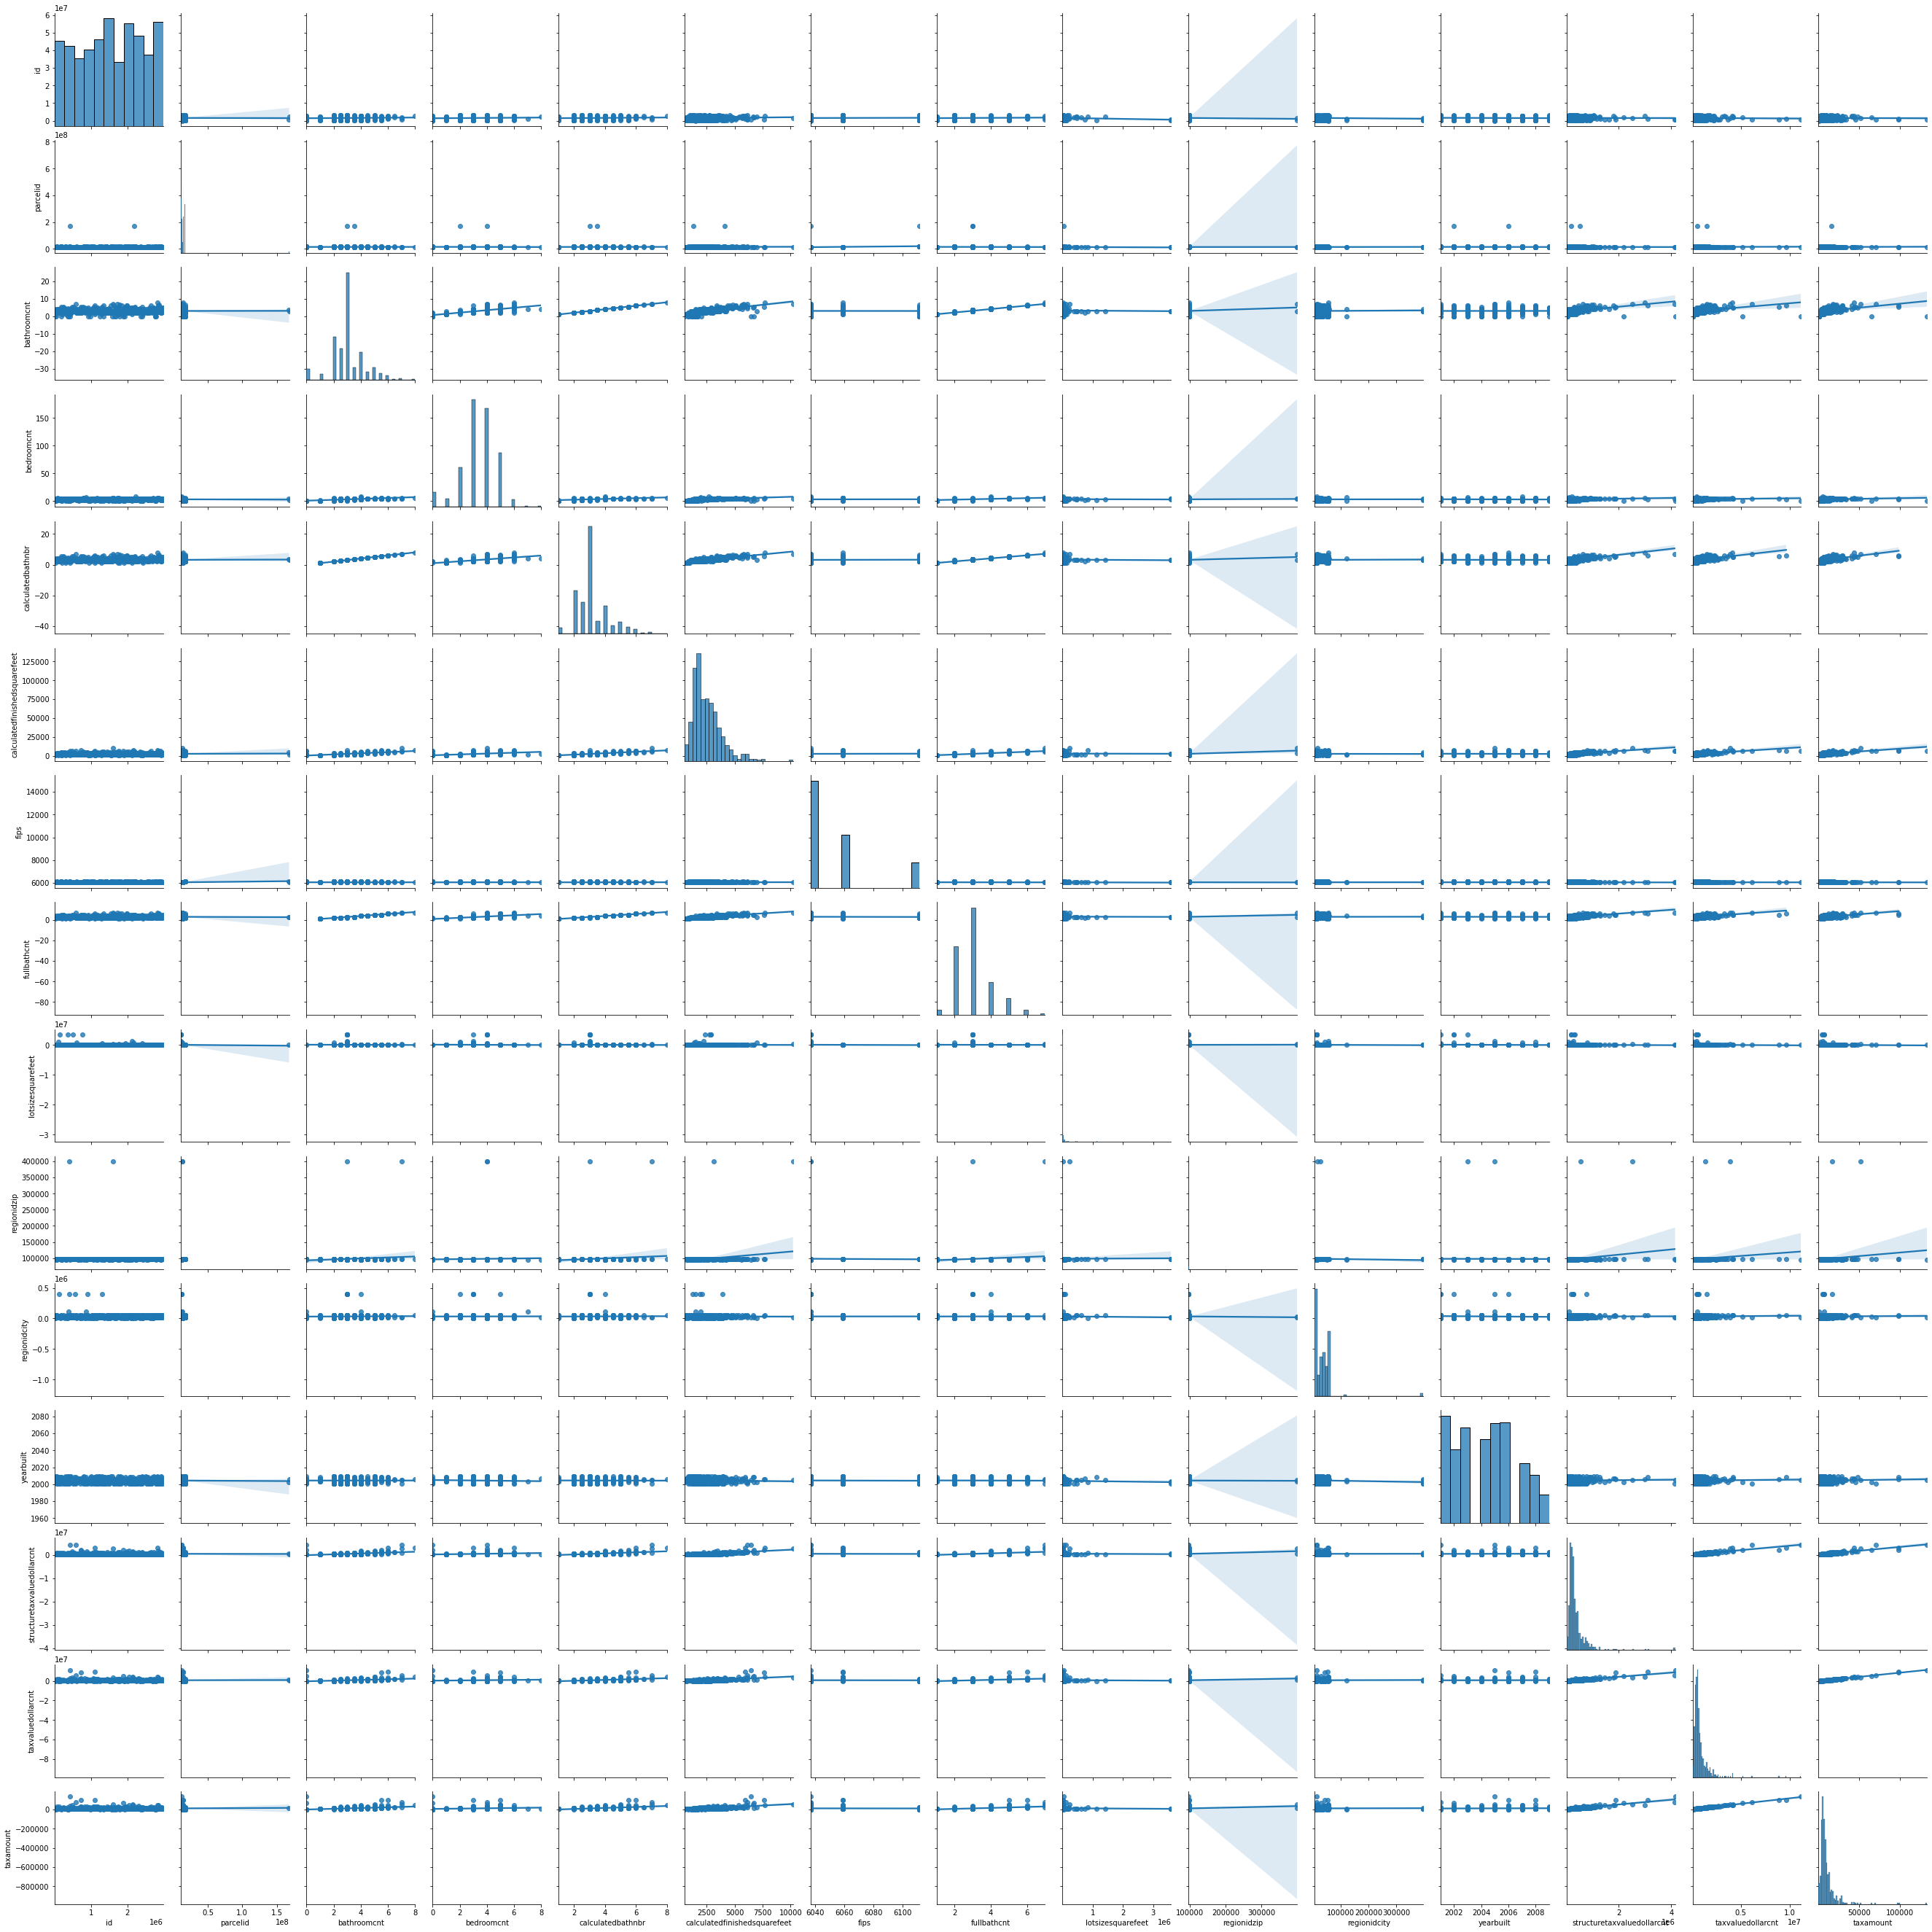

In [38]:
# Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the 
# pairwise relationships along with the regression line for each pair.

sns.pairplot(data = zillow_plot, kind = 'reg')

In [24]:
zillow_plot.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,lotsizesquarefeet,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount
0,2.0,2.0,1267.0,2.0,4753.0,97097.0,1987.0,170562.0,487320.0,5331.78
1,0.0,0.0,4809.0,NaN,14160.0,97041.0,1965.0,220316.0,398447.0,5263.20
2,2.0,3.0,1330.0,2.0,6015.0,96159.0,1944.0,41045.0,168172.0,2384.52
3,1.0,3.0,955.0,1.0,2100.0,96969.0,1963.0,62415.0,1192918.0,13186.44
4,3.0,2.0,1187.0,3.0,37472.0,96151.0,1973.0,172782.0,572127.0,7002.27


In [25]:
# Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with 
# a new feature tenure_years, in complete years as a customer.

zillow_plot['square_yards'] = zillow_plot['calculatedfinishedsquarefeet']/9

<ipython-input-25-c6fc8278c82b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_plot['square_yards'] = zillow_plot['calculatedfinishedsquarefeet']/9


In [33]:
zillow_plot = zillow[(zillow['yearbuilt'] > 2000) & (zillow['yearbuilt'] < 2010)]

<AxesSubplot:xlabel='yearbuilt', ylabel='calculatedfinishedsquarefeet'>

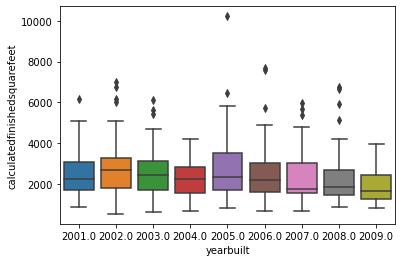

In [36]:
# Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the 
# columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a 
# categorical variable and a continuous variable.

sns.boxplot(x = 'yearbuilt', y = 'calculatedfinishedsquarefeet', data = zillow_plot)

<AxesSubplot:xlabel='yearbuilt', ylabel='count'>

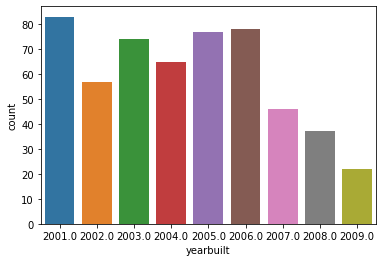

In [37]:
sns.countplot(x = 'yearbuilt', data = zillow_plot)

In [50]:
def prep_zillow(zillow):
    zillow_plot = zillow[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 
                      'lotsizesquarefeet',  'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt', 
                      'taxvaluedollarcnt', 'taxamount']]
    zillow_plot = zillow[(zillow['yearbuilt'] > 2000) & (zillow['yearbuilt'] < 2010)]
    return zillow_plot

In [51]:
def plot_variable_pairs(zillow):
     return sns.pairplot(data = zillow, kind = 'reg')

In [52]:
def square_yards(zillow):
    zillow['square_yards'] = zillow['calculatedfinishedsquarefeet']/9

In [60]:
def plot_categorical_and_continuous_vars(zillow, continuous_col, categorical_col):
    box = sns.boxplot(x = categorical_col, y = continuous_col, data = zillow)
    count = sns.countplot(x = categorical_col, data = zillow)
    return plt.subplots(box, count, figsize=(10,5))

ValueError: Number of rows must be a positive integer, not AxesSubplot(0.125,0.125;0.775x0.755)

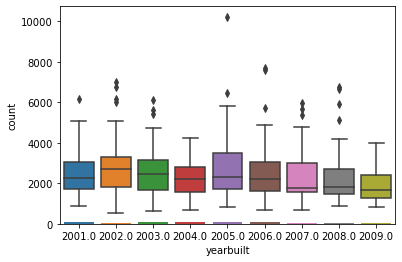

<Figure size 720x360 with 0 Axes>

In [61]:
plot_categorical_and_continuous_vars(zillow_plot, 'calculatedfinishedsquarefeet', 'yearbuilt')